In [4]:
import matplotlib as mat
import matplotlib.pyplot as plt
from scipy.stats import halfnorm, expon, norm
import numpy as np

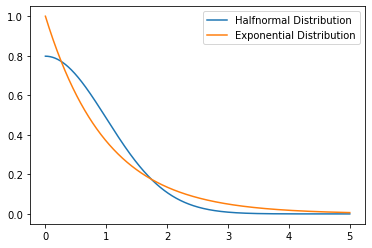

In [301]:
#Graphical representation of halfnorm and exponential distribution
grid = np.linspace(0, 5, 1000)
f = halfnorm.pdf(x = grid, loc = 0, scale = 1)
g = expon.pdf(x = grid, scale = 1)
plt.plot(grid, f, label = 'Halfnormal Distribution')
plt.plot(grid, g, label = 'Exponential Distribution')
plt.legend()
plt.show()

In [11]:
#Acceptance Rejection Sampling
import random
import math
from scipy.stats import halfnorm
def AR(alpha, sample):
    x1 = np.random.uniform(size = sample)
    x2 = np.random.exponential(size = sample)
    x3 = halfnorm.pdf(x2, loc = 0, scale = 1)
    acceptances = x1*expon.pdf(x2) <= alpha*x3 #Vector of True/False
    X = x2[acceptances]
    emp = np.mean(acceptances) #True = 1, False = 0 => % of successes
    grid = np.linspace(0,5,1000)
    plt.plot(grid, halfnorm.pdf(grid), color = 'black', label = 'Halfnormal Distribution')
    plt.hist(X, bins = 50, density = True, label = 'Halfnormal Estimation')
    plt.legend()
    plt.show()
    print(f'The empirical acceptance rate is {emp}')
    print(f'The theoretical acceptance rate is {alpha}')
    
    #The code below works, but, since it uses the inverse cdf method to randomly sample from the exponential,
    #it's less efficient than the code above. 
    '''
    x = []
    for i in range(sample):
        U1 = random.random()
        Y = -math.log(1-U1)
        U2 = random.random()
        if U2*expon.pdf(Y, scale = 1) <= alpha*halfnorm.pdf(Y, loc = 0, scale = 1):
            x.append(Y)
    plt.hist(x, bins = 100, density = True, label = 'Halfnormal Estimation')
    grid = np.linspace(0, 4, 1000)
    plt.plot(grid, halfnorm.pdf(grid, 0, 1), color = 'red', label = 'Halfnormal Distribution')
    plt.legend()
    plt.show()
    '''
    return X

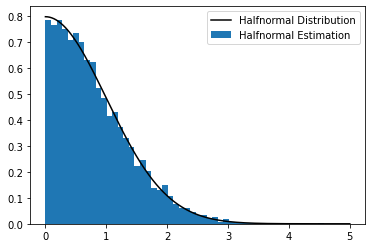

The empirical acceptance rate is 0.5093
The theoretical acceptance rate is 0.5


array([0.32409245, 0.36079692, 1.17074927, ..., 0.21621358, 0.65878718,
       1.65797695])

In [360]:
AR(0.5, 10000)

In [20]:
#Check for the optimal alpha
def maximum(n = 1000, threshold = 0.001):
    l = []
    for i in range(n):
        x = random.choice(np.linspace(0, 5, 1000))
        y = halfnorm.pdf(x, 0, 1)/expon.pdf(x, scale = 1)
        l.append(y)
    result = max(l)
    return result, abs(math.sqrt(2*math.exp(1)/math.pi) - result) < threshold

In [351]:
#Accuracy of the estimation
import time
def accuracy(n = 1000, threshold = 0.001):
    start = time.time()
    l2 = []
    for i in range(100):
        l2.append(maximum(n, threshold)[1])
    counter = 0
    for i in range(len(l2)):
        if l2[i]:
            counter = counter + 1
    end = time.time()
    #print(f'Percentage correctly estimated: {counter/len(l2)*100}%')
    #print(f'Running time: {end-start} seconds')
    return counter/len(l2)

In [352]:
#To check correlation between sample size and accuracy of the estimated maximum.
start = time.time()
x = [i for i in range(100, 510, 10)]
y = [accuracy(x[i], 0.001) for i in range(len(x))]
end = time.time()
print(f'Running time: {end-start} seconds')

Running time: 864.9388604164124 seconds


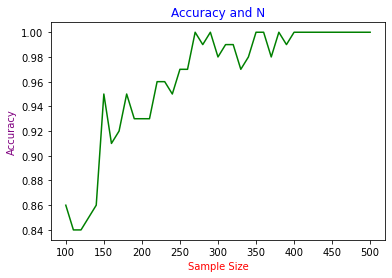

In [353]:
plt.plot(x,y, color = 'green')
plt.title('Accuracy and N', color = 'blue')
plt.xlabel('Sample Size', color = 'red')
plt.ylabel('Accuracy', color = 'purple')
plt.show()
#There's a positive correlation between the sample size and the accuracy of the function.

In [24]:
#Estimation of the maximum
import math
def maxest(n1 = 100, n2 = 1000, threshold = 0.001):
    start = time.time()
    l = []
    for i in range(n1):
        l.append(maximum(n2, threshold)[0])
    maxest = sum(l)/len(l)
    end = time.time()
    print(f'Running time: {end-start} seconds')
    return maxest
x1 = maxest() 
print(f'The estimated maximum is {x1}')
print(f'The distance from the target is {abs(x1-(math.sqrt(2*math.exp(1)/math.pi)))}')

Running time: 61.547560691833496 seconds
The estimated maximum is 1.3154796906962367
The distance from the target is 9.556262677179461e-06


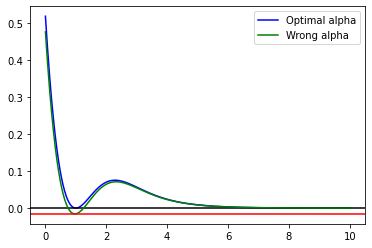

Running time: 0.6018390655517578 seconds


In [12]:
import time
x = np.linspace(0,10,1000)
f = halfnorm.pdf(x, 0, 1)
g = expon.pdf(x, scale = 1)

#To verify that the optimal alpha is the highest possible such that [(1/alpha)*g - f] is positive
start = time.time()
alpha = 1/math.sqrt(2*math.exp(1)/math.pi)
k = min((1/alpha)*g - f)
plt.plot(x, (1/alpha)*g - f, color = 'blue', label = 'Optimal alpha')
plt.axhline(k, color = 'black')
beta = alpha + 0.025
j = min((1/beta)*g - f)
plt.plot(x, (1/beta)*g - f, color = 'green', label = 'Wrong alpha')
plt.axhline(j, color = 'red')
plt.legend()
plt.show()
end = time.time()
print(f'Running time: {end-start} seconds')

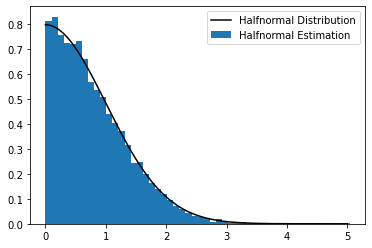

The empirical acceptance rate is 0.7598
The theoretical acceptance rate is 0.7601734505331403


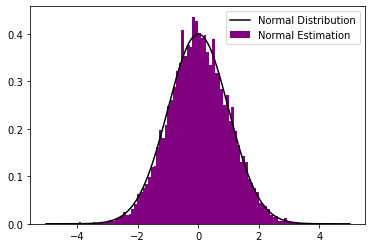

"\nnormal = []\nfor i in range(len(halfn)):\n    U = random.uniform(0, 1)\n    if U <= 0.5:\n        z = halfn[i]\n    else:\n        z = -halfn[i]\n    normal.append(z)\ngrid = np.linspace(-4,4,1000)\nplt.plot(grid, norm.pdf(grid, 0, 1), color = 'black', label = 'Normal Distribution')\nplt.hist(normal, bins = 100, density = True, color = 'green', label = 'Normal Estimation')\nplt.legend()\nplt.show()  \n"

In [549]:
#Random Sampling from Normal Distribution
halfn = AR(1/math.sqrt(2*math.exp(1)/math.pi), 10000)
u = np.random.uniform(size = len(halfn))
boole = u <= 0.5 #Vector of True/False depending on the condition
xi = halfn*(2*boole - 1) #True = 1, False = 0
plt.hist(xi, bins = 100, density = True, color = 'purple', label = 'Normal Estimation')
grid = np.linspace(-5,5,1000)
plt.plot(grid, norm.pdf(grid, 0, 1), color = 'black', label = 'Normal Distribution')
plt.legend()
plt.show()

#The code below works, but, since it uses loops, it's less efficient.
'''
normal = []
for i in range(len(halfn)):
    U = random.uniform(0, 1)
    if U <= 0.5:
        z = halfn[i]
    else:
        z = -halfn[i]
    normal.append(z)
grid = np.linspace(-4,4,1000)
plt.plot(grid, norm.pdf(grid, 0, 1), color = 'black', label = 'Normal Distribution')
plt.hist(normal, bins = 100, density = True, color = 'green', label = 'Normal Estimation')
plt.legend()
plt.show()  
'''

The maximum of f(x)/g(x) is 1.3154885878969904


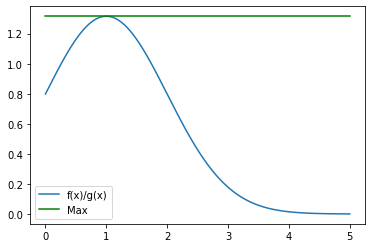

In [13]:
#Graphical representation of the maximum
grid = np.linspace(0, 5, 1000)
plt.plot(grid, halfnorm.pdf(grid, 0, 1)/expon.pdf(grid, scale = 1), label = 'f(x)/g(x)')
k = max(halfnorm.pdf(grid, 0, 1)/expon.pdf(grid, scale = 1))
print(f'The maximum of f(x)/g(x) is {k}')
plt.plot(grid, [k]*len(grid), color = 'green', label = 'Max')
plt.legend()
plt.show()

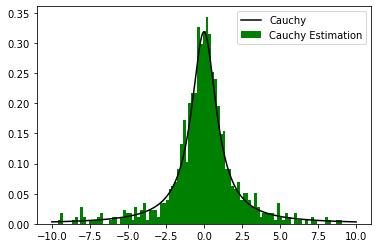

In [6]:
#Graphical Representation of Cauchy Distribution and Estimation
from scipy.stats import cauchy
grid = np.linspace(-10, 10, 10000)
plt.plot(grid, cauchy.pdf(grid), color = 'black', label = 'Cauchy')
c = np.random.standard_cauchy(1000)
c = c[(c>=-10) & (c<=10)] #Slicing for the desired range
plt.hist(c, bins = 100, density = True, color = 'green', label = 'Cauchy Estimation')
plt.legend()
plt.show()

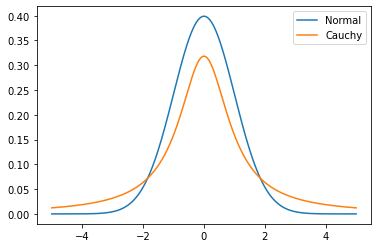

In [402]:
#Graphical representation of Normal and Cauchy: the Normal is not a good auxiliary function for the Cauchy.
from scipy.stats import poisson
grid = np.linspace(-5,5,1000)
plt.plot(grid, norm.pdf(grid), label = 'Normal')
plt.plot(grid, cauchy.pdf(grid), label = 'Cauchy')
plt.legend()

# Question 2.1
AR sampling of a Cauchy distribution starting from a Standard Normal Distribution would be feasible only within the range of values such that the Normal is higher than the Cauchy to begin with (around 0), while, for wider ranges, the required value of alpha would be too low, making the AR sampling too inefficient. In the most extreme scenario, in which the range is all R, alpha would tend to 0, making the AR sampling impossible to implement. 

In [344]:
#alpha for AR of a Cauchy from a Normal distribution
def alpha(a,b):
    grid = np.linspace(a, b, 1000)
    k = max(cauchy.pdf(grid)/norm.pdf(grid))
    return 1/k

Text(0.5, 1.0, 'Alpha and Range')

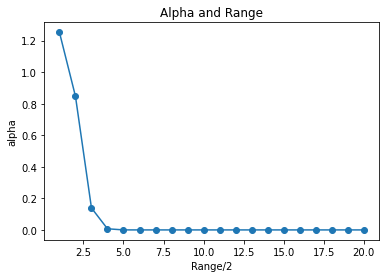

In [364]:
#alpha and range
x = [i for i in range(1,21)]
y = [alpha(x[i], -x[i]) for i in range(len(x))]
plt.plot(x,y, 'o-')
plt.xlabel('Range/2')
plt.ylabel('alpha')
plt.title('Alpha and Range')

In [333]:
#True P(X > 100)
cump = (1/math.pi)*(np.arctan(100)) + 0.5
p = 1 - cump
print(f'The true probability is {p}')

The true probability is 0.003182992764908188


In [8]:
#Inefficient Monte Carlo Estimation of p(X > 100)
def MCCauchy(n): 
    x = np.random.standard_cauchy(n)
    l = []
    for i in range(len(x)):
        if x[i] > 100:
            l.append(x[i])
    p = len(l)/len(x)
    #print(f'The estimated probability is {p}')  
    return p

def MCCauchy2(n): #Much higher efficiency (lower running time)
    x = np.random.standard_cauchy(n)
    x1 = x[x > 100] #Indicator Function
    p = len(x1)/n
    return p

Running time: 68.00848841667175 seconds


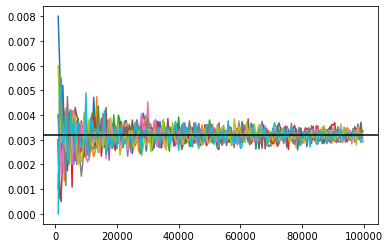

In [204]:
#Inefficient MC Estimation
import time
start = time.time()
for i in range(10):
    size = [i for i in range(1000, 100000, 500)]
    prob = [MCCauchy(size[i]) for i in range(len(size))]
    plt.plot(size, prob)

plt.axhline(1-((1/math.pi)*(np.arctan(100)) + 0.5), color = 'black') #True probability
end = time.time()
print(f'Running time: {end-start} seconds')

Running time: 12.602161645889282 seconds


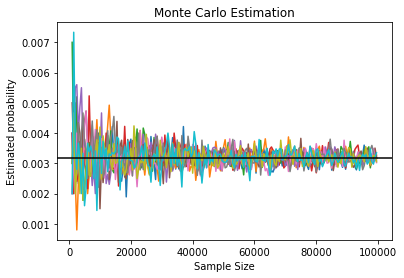

In [398]:
#Efficient MC estimation
start = time.time()
for i in range(10):
    size = [i for i in range(1000, 100000, 500)]
    prob = [MCCauchy2(size[i]) for i in range(len(size))]
    plt.plot(size, prob)

plt.title('Monte Carlo Estimation')
plt.xlabel('Sample Size')
plt.ylabel('Estimated probability')
plt.axhline(1-((1/math.pi)*(np.arctan(100)) + 0.5), color = 'black') #True probability
end = time.time()
print(f'Running time: {end-start} seconds') 

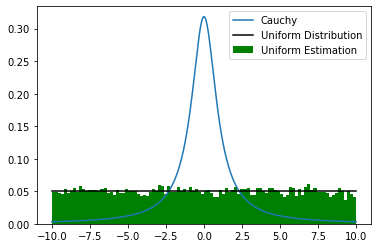

In [244]:
#Graphical Representation of Importance Sampling: Example
grid = np.linspace(-10, 10, 1000)
plt.plot(grid, cauchy.pdf(grid), label = 'Cauchy')
g = np.random.uniform(grid[0], grid[len(grid)-1], 10000)
plt.hist(g, bins = 100, density = True, color = 'green', label = 'Uniform Estimation')
u = [1/(grid[len(grid)-1]-grid[0])]*len(grid) #Density is 1/(b-a)
plt.plot(grid, u, color = 'black', label = 'Uniform Distribution')
plt.legend()

In [2]:
#Importance Sampling Estimation with Uniform in [a;b]
#NB: [a;b] needs to be significantly large to be valid
def ImpCauchy(n, a, b):
    xi = np.random.uniform(a, b, size = n)
    fi = cauchy.pdf(xi)
    mean = np.mean(fi*(b-a)) #E[f(x)/g(x)]
    #print(a)
    xi1 = xi[xi > 100] #Indicator Function
    l = cauchy.pdf(xi1)*(b-a)
    #print(l)
    p = np.sum(l)/n
    #print(len(xi))
    return p, mean

Running time: 14.418643951416016 seconds


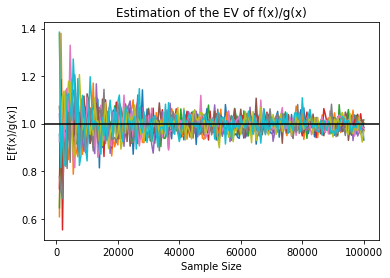

In [446]:
#Estimation of the EV of f(x)/g(x): it does converge to 1.
start = time.time()
for i in range(10):
    x = [n for n in range(1000, 100500, 500)]
    y = [ImpCauchy(x[i], -200, 200)[1] for i in range(len(x))]
    plt.plot(x,y)
plt.axhline(1, color = 'black')
plt.xlabel('Sample Size')
plt.ylabel('E[f(x)/g(x)]')
plt.title('Estimation of the EV of f(x)/g(x)')
end = time.time()
print(f'Running time: {end-start} seconds')
#print(f'The EV of f(x)/g(x) is {np.mean(l)}') 

Running time: 20.577210664749146 seconds


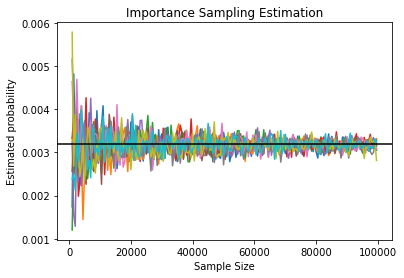

In [495]:
#Importance Sampling Estimation with Increasing Sample Size
start = time.time()
for i in range(10):
    x = [i for i in range(1000, 100000, 500)]
    y = [ImpCauchy(x[i], -20000, 20000)[0] for i in range(len(x))]
    plt.title('Importance Sampling Estimation')
    plt.xlabel('Sample Size')
    plt.ylabel('Estimated probability')
    plt.plot(x,y)

plt.axhline(1-((1/math.pi)*(np.arctan(100)) + 0.5), color = 'black')
end = time.time()
print(f'Running time: {end-start} seconds')

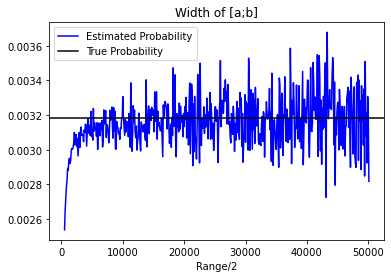

In [529]:
#Necessary width of [a;b]
x =[i for i in range(500, 50200, 100)]
y = [ImpCauchy(100000, -x[i], x[i])[0] for i in range(len(x))]
z = [np.var(y[0:i+1]) for i in range(len(y))]
plt.plot(x,y, color = 'blue', label = 'Estimated Probability')
plt.axhline(1-((1/math.pi)*(np.arctan(100)) + 0.5), color = 'black', label = 'True Probability')
plt.xlabel('Range/2')
plt.title('Width of [a;b]')
plt.legend()

Running time: 114.74249958992004 seconds


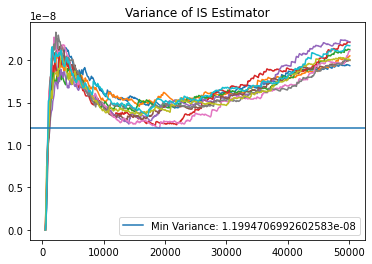

In [530]:
#Variance of IS estimator with respect to width (N = 100.000). As it's possible to see, the variance of the IS estimator is 
#approximately the lowest when the width of the range is around 30.000/40.000.
start = time.time()
l = []
for i in range(10):
    x =[i for i in range(500, 50200, 100)]
    y = [ImpCauchy(100000, -x[i], x[i])[0] for i in range(len(x))]
    z = [np.var(y[0:i+1]) for i in range(len(y))]
    l = l + z[50:]
    plt.plot(x, z)

plt.axhline(min(l), label = f'Min Variance: {min(l)}')
plt.title('Variance of IS Estimator')
plt.legend()
end = time.time()
print(f'Running time: {end-start} seconds')

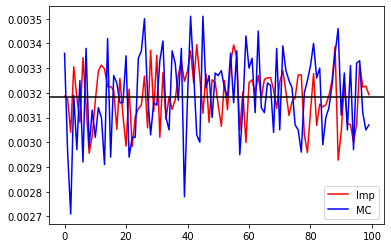

In [550]:
#IS Estimation fixing N = 100.000 and with optimal range.
y1 = [ImpCauchy(100000, -20000, 20000)[0] for i in range(100)]
y2 = [MCCauchy2(100000) for i in range(100)]
plt.plot(y1, color = 'red', label = 'Imp')
plt.plot(y2, color = 'blue', label = 'MC')
plt.axhline(1-((1/math.pi)*(np.arctan(100)) + 0.5), color = 'black')
plt.legend()

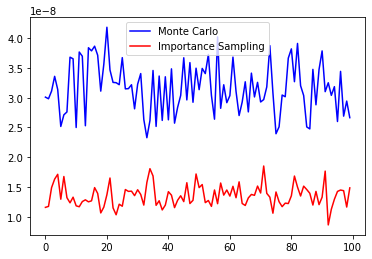

In [9]:
#Comparison of Variances fixing N = 100.000 and with optimal range.
mcvar = []
impvar = []
for i in range(100):
    y1 = [ImpCauchy(100000, -20000, 20000)[0] for i in range(100)]
    y2 = [MCCauchy2(100000) for i in range(100)]
    mcvar.append(np.var(y2))
    impvar.append(np.var(y1))
plt.plot(mcvar, color = 'blue', label = 'Monte Carlo')
plt.plot(impvar, color = 'red', label = 'Importance Sampling')
plt.legend()
#Importance Sampling is more efficient than MC for large sample sizes

Running time: 21.136559009552002 seconds


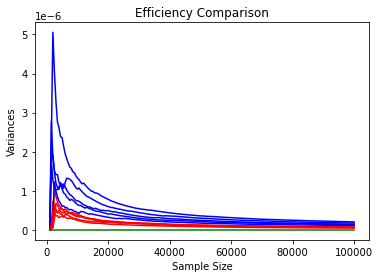

In [548]:
#Comparison of efficiency with optimal range as the sample size increases. 
start = time.time()
for i in range(5):
    x = [i for i in range(1000, 100500, 500)]
    imp = [ImpCauchy(x[i], -20000, 20000)[0] for i in range(len(x))]
    mc = [MCCauchy2(x[i]) for i in range(len(x))]
    mcvar = [np.var(mc[0:i+1]) for i in range(len(mc))]
    impvar = [np.var(imp[0:i+1]) for i in range(len(imp))]
    zero = np.zeros(len(x))
    plt.plot(x, mcvar, color = 'blue')
    plt.plot(x, impvar, color = 'red')
    
plt.plot(x, zero, color = 'green')    
plt.title('Efficiency Comparison')
plt.xlabel('Sample Size')
plt.ylabel('Variances')
end = time.time()
print(f'Running time: {end-start} seconds')